In [59]:
#import libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'skimage'

In [5]:
#load data
from keras.datasets import cifar10
#train data sets and test data sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
#check data types
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [9]:
#get shape of arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('x_test shape:', y_test.shape)

#x_train 50,000 rows of data with 32x32 images with depth 3-> rgb


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
x_test shape: (10000, 1)


In [24]:
#check first image as an array
#index changes the image
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

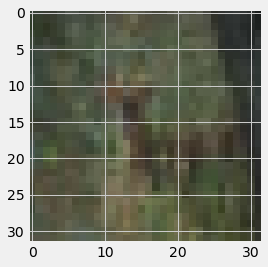

In [25]:
#show above as image
img = plt.imshow(x_train[index])

In [26]:
#get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [27]:
# create image class
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"  
]

#print image class
print('The image class is:', classes[y_train[index][0]])

The image class is: deer


In [45]:
#convert labels into 10 numbers to input into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [30]:
print(y_train_one_hot)
#10 numbers "1" means the label that the image is

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [31]:
#print new label of the current image
print("The one hot label is:", y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [32]:
#convert to values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [35]:
#create models architecture
model = Sequential()

#add first layer
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

#pooling layer, 2x2 pixel filter, gets max element from feature maps
model.add(MaxPooling2D(pool_size = (2,2)))

model.add( Conv2D(32, (5,5), activation='relu') )

#pooling layer #2
model.add(MaxPooling2D(pool_size = (2,2)))

#flattening layer to linear array
model.add(Flatten())

#add layer with 1000 neurons
model.add(Dense(1000, activation = 'relu'))

#add drop out layer
model.add(Dropout(0.5))

#add layer with 500 neurons
model.add(Dense(500, activation = 'relu'))

#add drop out layer
model.add(Dropout(0.5))

#add layer with 250 neurons
model.add(Dense(250, activation = 'relu'))

#add layer with 10 neurons
model.add(Dense(10, activation = 'softmax'))

In [36]:
#Compile the model
model.compile(loss = "categorical_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])

In [37]:
#train our model
hist = model.fit(x_train, y_train_one_hot,
                batch_size = 256,
                epochs = 10,
                validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 10s 62ms/step - loss: 1.8299 - accuracy: 0.3126 - val_loss: 1.5153 - val_accuracy: 0.4365
Epoch 2/10
157/157 [==============================] - 10s 61ms/step - loss: 1.4583 - accuracy: 0.4656 - val_loss: 1.3330 - val_accuracy: 0.5136
Epoch 3/10
157/157 [==============================] - 10s 61ms/step - loss: 1.2962 - accuracy: 0.5315 - val_loss: 1.2239 - val_accuracy: 0.5625
Epoch 4/10
157/157 [==============================] - 9s 60ms/step - loss: 1.1917 - accuracy: 0.5756 - val_loss: 1.1757 - val_accuracy: 0.5806
Epoch 5/10
157/157 [==============================] - 10s 63ms/step - loss: 1.0969 - accuracy: 0.6089 - val_loss: 1.1206 - val_accuracy: 0.6082
Epoch 6/10
157/157 [==============================] - 10s 62ms/step - loss: 1.0243 - accuracy: 0.6382 - val_loss: 1.0233 - val_accuracy: 0.6404
Epoch 7/10
157/157 [==============================] - 10s 62ms/step - loss: 0.9576 - accuracy: 0.6619 - val_loss: 1.0059 - val_accuracy: 

In [46]:
#evaluate model using test data
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 4ms/step - loss: 0.9699 - accuracy: 0.6630


0.6629999876022339

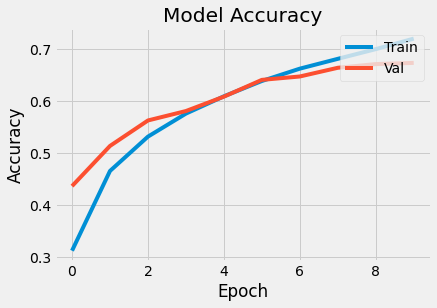

In [51]:
#visualize model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

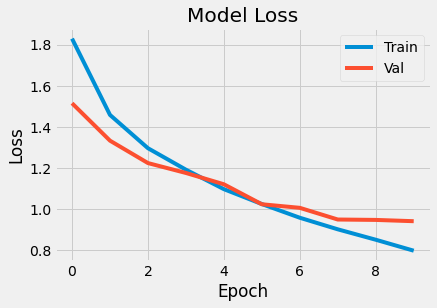

In [52]:
#visualize model's loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

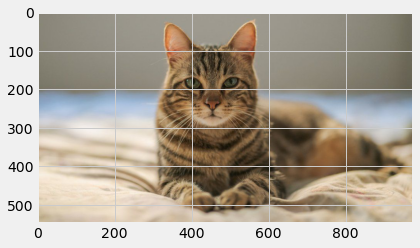

In [57]:
new_image = plt.imread('cat.jpg')
img = plt.imshow(new_image)

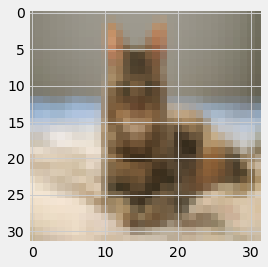

In [62]:
#resize image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [63]:
#get model's predictions
predictions = model.predict(np.array([resized_image]))
predictions

array([[9.3417754e-03, 2.9444287e-04, 2.0197414e-01, 3.5339516e-01,
        8.2024656e-02, 2.5394213e-01, 2.8640879e-02, 6.2915727e-02,
        5.9101726e-03, 1.5609716e-03]], dtype=float32)

In [67]:
#sort the predictions from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index][j]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
#show sorted labels
print(list_index)

[3, 5, 2, 4, 7, 6, 0, 8, 9, 1]


In [70]:
#print first 5 predictions(classes)
for i in range(10):
    print(classes[list_index[i]], ':', round(predictions[0][list_index][i] * 100,2), '%')

cat : 35.34 %
dog : 25.39 %
bird : 20.2 %
deer : 8.2 %
horse : 6.29 %
frog : 2.86 %
airplane : 0.93 %
ship : 0.59 %
truck : 0.16 %
automobile : 0.03 %
